In [13]:
%load_ext autoreload
%autoreload 2
from qm.QuantumMachinesManager import QuantumMachinesManager
from qm.qua import *
from qm import SimulationConfig
import numpy as np
import matplotlib.pyplot as plt
ip='127.0.0.1'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# IQ waveforms : for the mixer croud

When driving an IQ mixer, you need to generate a pair of out-of-phase waveforms.
This is taken care of by QUA, by introducing a mixed-input quantum elemnt. 


The following configuration dictionary defines a single quantum element `qe1` which is a so-called `mixInputs` element, with both I and Q channels.

In [23]:
config = {
    "version": 1,
    "controllers": {
        "con1": {
            "type": "opx1",
            "analog_outputs": {
                1: {"offset": +0.0},
                2: {"offset": +0.0},
            },
        }
    },
    "elements": {
        "qe1": {
            "mixInputs": {"I": ("con1", 1),"Q": ("con1", 2)},
            "intermediate_frequency": 5e6,
            "operations": {
                "playOp": "constPulse",
            },
        },
    },
    "pulses": {
        "constPulse": {
            "operation": "control",
            "length": 1000,  # in ns
            "waveforms": {"I": "const_wf","Q":"const_wf"},
        },
    },
    "waveforms": {
        "const_wf": {"type": "constant", "sample": 0.2},
    },
}

We use this configuration to run a simple QUA program, generating a pair of signals in antiphase. 

2021-03-30 12:17:57,830 - qm - INFO - Performing health check
2021-03-30 12:17:57,849 - qm - INFO - Health check passed
2021-03-30 12:17:57,853 - qm - WARNING - Client's version (0.90.690) does not match the server version (0.91.781).
2021-03-30 12:17:57,867 - qm - INFO - to simulate a program, use QuantumMachinesManager.simulate(..)
2021-03-30 12:17:57,873 - qm - INFO - Flags: 
2021-03-30 12:17:57,873 - qm - INFO - Simulating Qua program


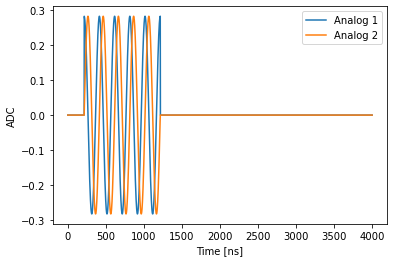

In [24]:
QMm = QuantumMachinesManager()
QMm.close_all_quantum_machines()
QM1 = QMm.open_qm(config)
with program() as prog:
    play("playOp", "qe1")

job = QM1.simulate(prog, SimulationConfig(int(1000)))  # in clock cycles, 4 ns

samples = job.get_simulated_samples()
samples.con1.plot()


All commands we've seen so far that work on a single-input element work equally on mixed input elements.

The following code scales the amplitude, changes the frequency and stretches the duration of a mixed input signal.

2021-03-30 12:17:59,189 - qm - INFO - Performing health check
2021-03-30 12:17:59,194 - qm - INFO - Health check passed
2021-03-30 12:17:59,198 - qm - WARNING - Client's version (0.90.690) does not match the server version (0.91.781).
2021-03-30 12:17:59,220 - qm - INFO - to simulate a program, use QuantumMachinesManager.simulate(..)
2021-03-30 12:17:59,230 - qm - INFO - Flags: 
2021-03-30 12:17:59,231 - qm - INFO - Simulating Qua program


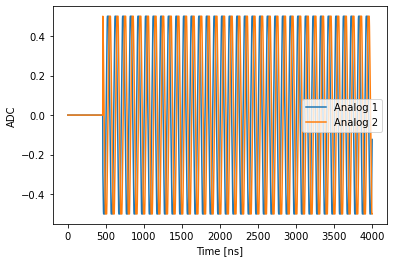

In [25]:
QMm = QuantumMachinesManager()
QMm.close_all_quantum_machines()
QM1 = QMm.open_qm(config)
with program() as prog:
    update_frequency("qe1",10e6)
    play("playOp"*amp(2), "qe1",duration=1000)

job = QM1.simulate(prog, SimulationConfig(int(1000)))  # in clock cycles, 4 ns

samples = job.get_simulated_samples()
samples.con1.plot()


# Excercise

1. play a pulse to a mixed element, change the amplitude, duration and frequency using `update_frequency`. 